In [1]:
import pickle
import os
import visualiser
from collections import defaultdict
import hashlib

Папка с нужными результатами

In [2]:
RESULT_FOLDER = ['results_delete']

Загружаем результаты и разворачиваем их в один список

In [3]:
all_res = []
for folder in RESULT_FOLDER:
    for file in os.listdir(folder):
        with open(folder + "/" + file, "rb") as f:
            all_res.append(pickle.load(f))

all_res = [j for i in all_res for j in i]

Сохраняем результаты в словарь, где ключ - frozenset от параметров, а значение - все запуски с этими параметрами

In [4]:
results = defaultdict(list)
for i in all_res:
    results[frozenset(sorted(i[1][3].items()))].append(i[-1])

Проверяем длины, что все ок

In [5]:
for i in results:
    print(len(results[i]))

7
7
2
1
1
2
1
1


Визуализируем результаты

frozenset({('cov_ema_decay', 0.95), ('invert_every', 100), ('learning_rate', 0.0001), ('momentum', 0.9), ('cov_update_every', 1), ('damping', 0.005)})


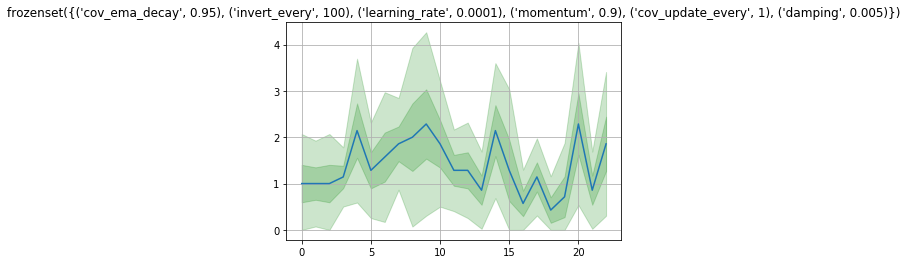

frozenset({('cov_ema_decay', 0.95), ('invert_every', 100), ('learning_rate', 0.0001), ('momentum', 0.9), ('cov_update_every', 1), ('damping', 0.03)})


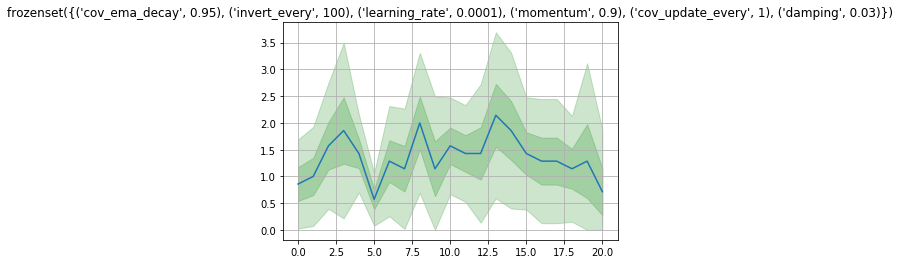

frozenset({('cov_ema_decay', 0.95), ('invert_every', 100), ('learning_rate', 0.0001), ('momentum', 0.95), ('cov_update_every', 1), ('damping', 0.005)})


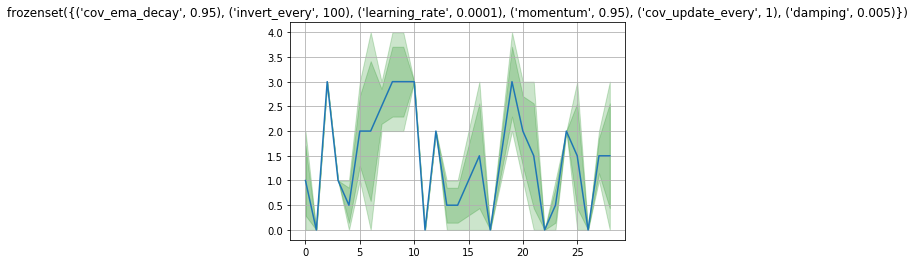

frozenset({('cov_ema_decay', 0.95), ('invert_every', 100), ('learning_rate', 0.0001), ('momentum', 0.95), ('cov_update_every', 1), ('damping', 0.03)})


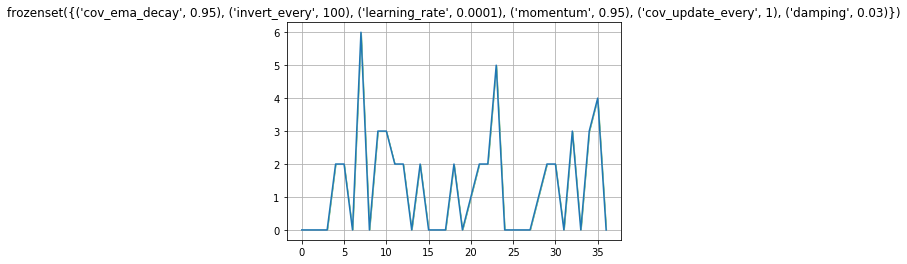

frozenset({('cov_ema_decay', 0.99), ('invert_every', 100), ('learning_rate', 0.0001), ('momentum', 0.9), ('cov_update_every', 1), ('damping', 0.005)})


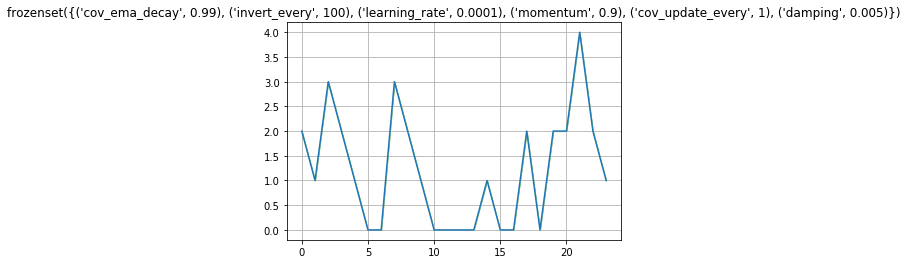

frozenset({('cov_ema_decay', 0.99), ('invert_every', 100), ('learning_rate', 0.0001), ('momentum', 0.9), ('cov_update_every', 1), ('damping', 0.03)})


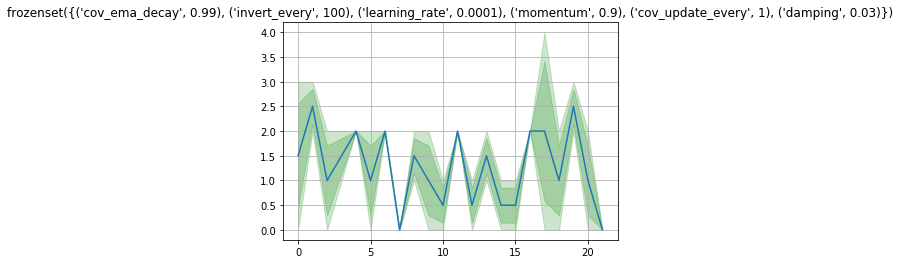

frozenset({('cov_ema_decay', 0.99), ('invert_every', 100), ('learning_rate', 0.0001), ('momentum', 0.95), ('cov_update_every', 1), ('damping', 0.005)})


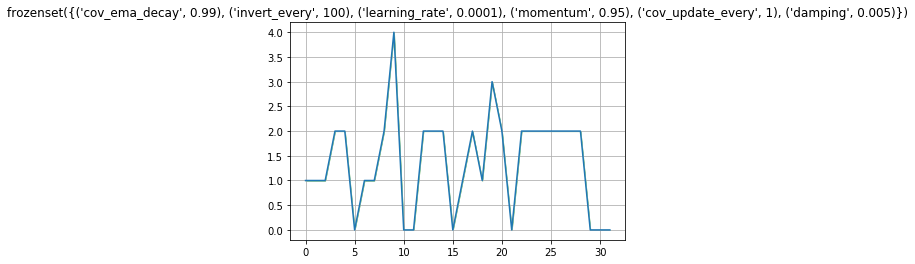

frozenset({('cov_ema_decay', 0.99), ('invert_every', 100), ('learning_rate', 0.0001), ('momentum', 0.95), ('cov_update_every', 1), ('damping', 0.03)})


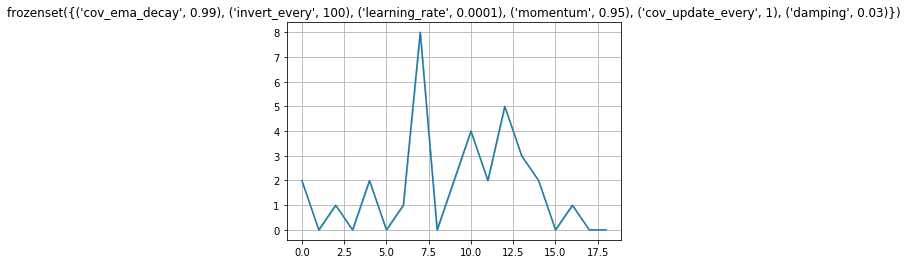

In [6]:
for i in results:
    print(i)
    visualiser.visualise([results[i]], color='green', title=str(i), clipping=-200)

In [17]:
import random

Выбираем те, которые нравятся и оставляем

In [18]:
good_results = [
    frozenset({('epsilon', 1e-10), ('momentum', 0.95), ('learning_rate', 0.0001), ('decay', 0.95)}),
frozenset({('epsilon', 1e-10), ('momentum', 0.99), ('learning_rate', 0.0001), ('decay', 0.95)}),
frozenset({('epsilon', 1e-10), ('momentum', 0.95), ('learning_rate', 0.0001), ('decay', 0.99)}),
frozenset({('beta2', 0.99), ('learning_rate', 0.001), ('beta1', 0.9), ('epsilon', 1e-08)}),
frozenset({('beta2', 0.999), ('learning_rate', 0.001), ('beta1', 0.5), ('epsilon', 1e-08)}),
frozenset({('beta2', 0.99), ('learning_rate', 0.001), ('beta1', 0.5), ('epsilon', 1e-08)}),
frozenset({('cov_update_every', 1), ('momentum', 0.9), ('invert_every', 100), ('learning_rate', 0.001), ('damping', 0.01), ('cov_ema_decay', 0.95)})
]

Снова визуализируем

for i in good_results:
    print(i)
    visualiser.visualise([results[i]], color='green', title=str(i))

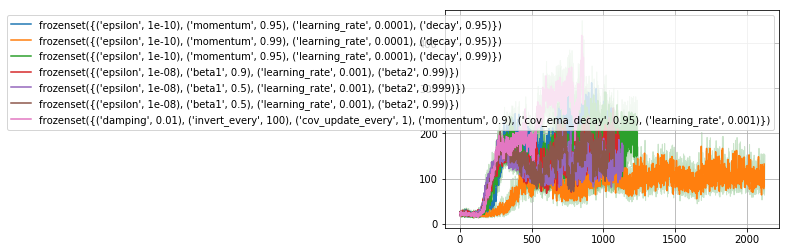

In [19]:
visualiser.visualise(
    [results[i] for i in good_results],
    color='green',
    show_std=False,
    legend=True,
    labels=[i for i in good_results])

А теперь три вместе

In [7]:
RESULT_FOLDER = ["results_kfac_new", "results_rmsprop", "results_adam"]
all_res = []
for folder in RESULT_FOLDER:
    for file in os.listdir(folder):
        with open(folder + "/" + file, "rb") as f:
            all_res.append(pickle.load(f))

all_res = [j for i in all_res for j in i]

In [8]:
results = defaultdict(list)
for i in all_res:
    results[frozenset(sorted(i[1][3].items()))].append(i[-1])

In [12]:
good_results = [
    frozenset({('learning_rate', 0.0001), ('epsilon', 1e-10), ('momentum', 0.95), ('decay', 0.95)}),
    frozenset({('beta1', 0.9), ('beta2', 0.999), ('epsilon', 1e-08), ('learning_rate', 0.001)}),
    frozenset({('cov_ema_decay', 0.9), ('momentum', 0.9), ('invert_every', 100), ('learning_rate', 0.0005), ('damping', 0.01), ('cov_update_every', 1)}),
]

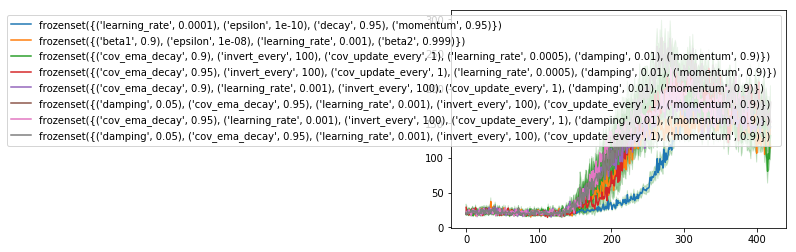

In [14]:
visualiser.visualise(
    [results[i] for i in good_results],
    color=['green', 'blue', 'orange'],
    show_std=False,
    legend=True,
    labels=[i for i in good_results]
)